# Cars


We have the dataset of cars available in India, lets compare prices, specs, fuel economy etc. across car types. 

In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
options(repr.plot.width = 10, repr.plot.height = 6)

### Read CSV

In [3]:
df <- read.csv("data/cars.tidy.csv", stringsAsFactor = FALSE)
df$price_in_1000 = df$price / 1000
colnames(df)

[1] "name"              "model"             "price"            
 [4] "type"              "engine"            "fuel"             
 [7] "weight"            "clearance"         "bhp"              
[10] "rpm"               "mileage_city"      "mileage_highway"  
[13] "cylinders"         "seats"             "transmission_type"
[16] "brand"             "gears"             "transmission"     
[19] "fuel_type"         "price_in_1000"

### Filter all cars above 17 lakhs

In [4]:
df <- filter(df, price < 1700000)

In [5]:
head(df, 3)

,name,model,price,type,engine,fuel,weight,clearance,bhp,rpm,mileage_city,mileage_highway,cylinders,seats,transmission_type,brand,gears,transmission,fuel_type,price_in_1000
1,Ashok Leyland Stile,Ashok Leyland Stile LE 8-STR (Diesel),749990,MPV,1461,Diesel,2000,180,75,3300,16.2,20.7,4,8,5 Speed Manual,Ashok,5,Manual,1,749.99
2,Chevrolet Cruze,Chevrolet Cruze LT (Diesel),1379222,Sedan,1998,Diesel,NA,165,163.73,3800,11.83425,17.3,4,5,6 Speed Manual,Chevrolet,6,Manual,1,1379.222
3,Chevrolet Enjoy,Chevrolet Enjoy 1.4 LS 8 Seater (Petrol),611960,MPV,1399,Petrol,1860,161,102.58,6000,11.83425,13.7,4,8,5 Speed Manual,Chevrolet,5,Manual,0,611.96


In [6]:
length(unique(df$name))

[1] 101

In [8]:
str(df)

'data.frame':	101 obs. of  20 variables:
 $ name             : chr  "Ashok Leyland Stile" "Chevrolet Cruze" "Chevrolet Enjoy" "Chevrolet Sail" ...
 $ model            : chr  "Ashok Leyland Stile LE 8-STR (Diesel)" "Chevrolet Cruze LT (Diesel)" "Chevrolet Enjoy 1.4 LS 8 Seater (Petrol)" "Chevrolet Sail 1.2 Base (Petrol)" ...
 $ price            : num  749990 1379222 611960 550677 467689 ...
 $ type             : chr  "MPV" "Sedan" "MPV" "Sedan" ...
 $ engine           : int  1461 1998 1399 1199 1199 995 2499 1198 1368 1368 ...
 $ fuel             : chr  " Diesel" " Diesel" " Petrol" " Petrol" ...
 $ weight           : chr  " 2000" NA " 1860" " 1450" ...
 $ clearance        : num  180 165 161 174 174 170 184 170 205 185 ...
 $ bhp              : chr  " 75 " " 163.73 " " 102.58 " " 82.45 " ...
 $ rpm              : chr  " 3300" " 3800" " 6000" " 6000" ...
 $ mileage_city     : num  16.2 11.8 11.8 15.9 15 ...
 $ mileage_highway  : num  20.7 17.3 13.7 18.2 18.2 ...
 $ cylinders        : int

## Single variable visualization
### Engine Capacity

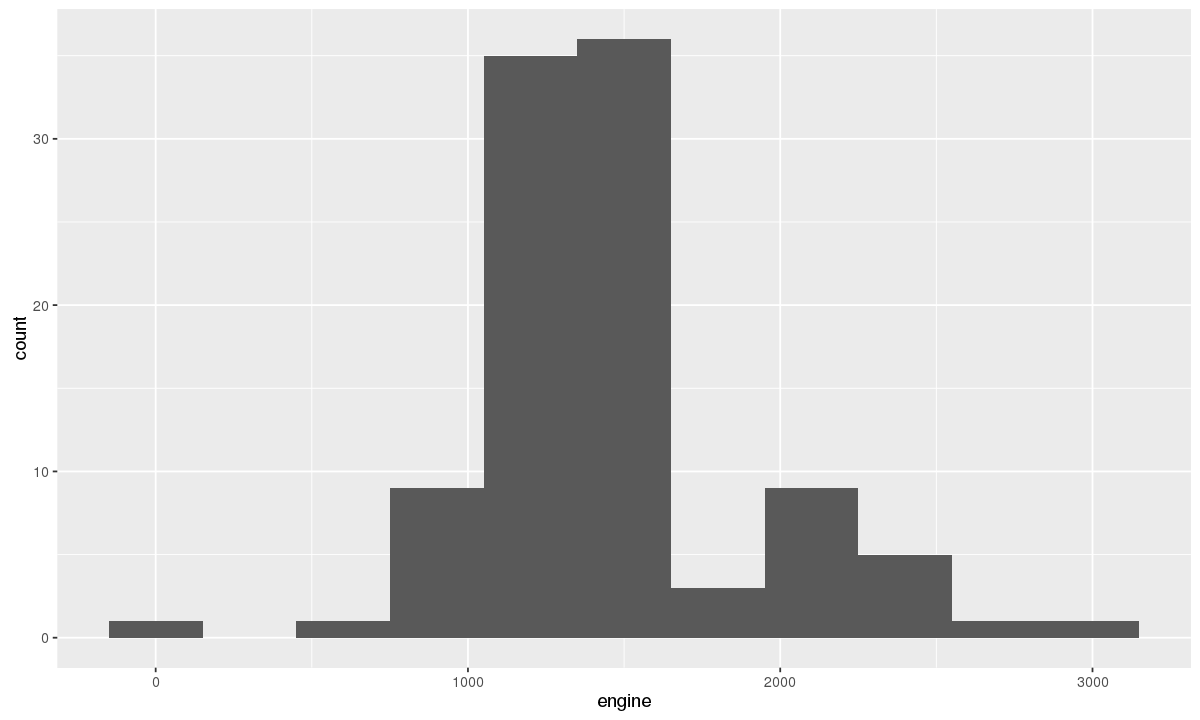

In [9]:
ggplot(df, aes(engine)) + geom_histogram(binwidth = 300)

### Seating Capacity

Warning message:
: Removed 7 rows containing non-finite values (stat_count).

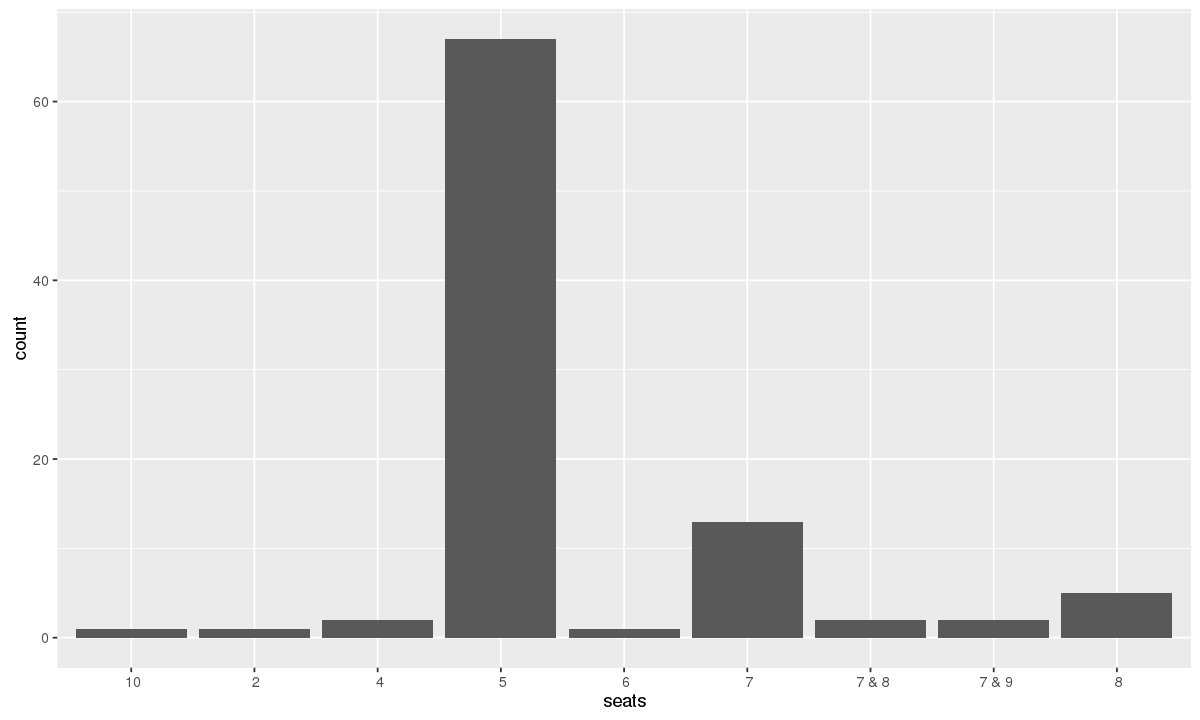

In [12]:
ggplot(df, aes(seats)) + geom_bar(stat = "count")

In [13]:
unique(df$type)

[1] "MPV"       "Sedan"     "Hatchback‎"  "Hatchback" "MUV"       "SUV"      
[7] "Van"

In [14]:
colnames(df)

[1] "name"              "model"             "price"            
 [4] "type"              "engine"            "fuel"             
 [7] "weight"            "clearance"         "bhp"              
[10] "rpm"               "mileage_city"      "mileage_highway"  
[13] "cylinders"         "seats"             "transmission_type"
[16] "brand"             "gears"             "transmission"     
[19] "fuel_type"         "price_in_1000"

## Multi variable visualization
### Mileage in city vs Engine capacity

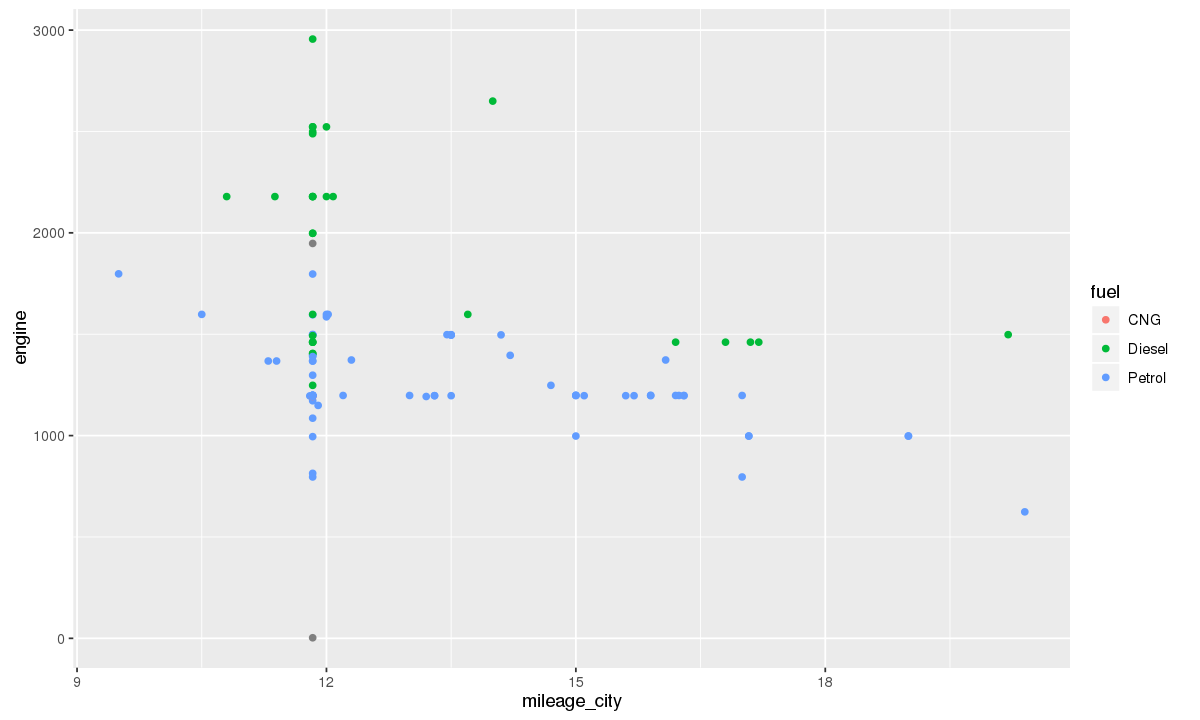

In [15]:
ggplot(df,
 aes(mileage_city, engine, color=fuel)) + geom_point()

### Visualize the mileage of petrol cars

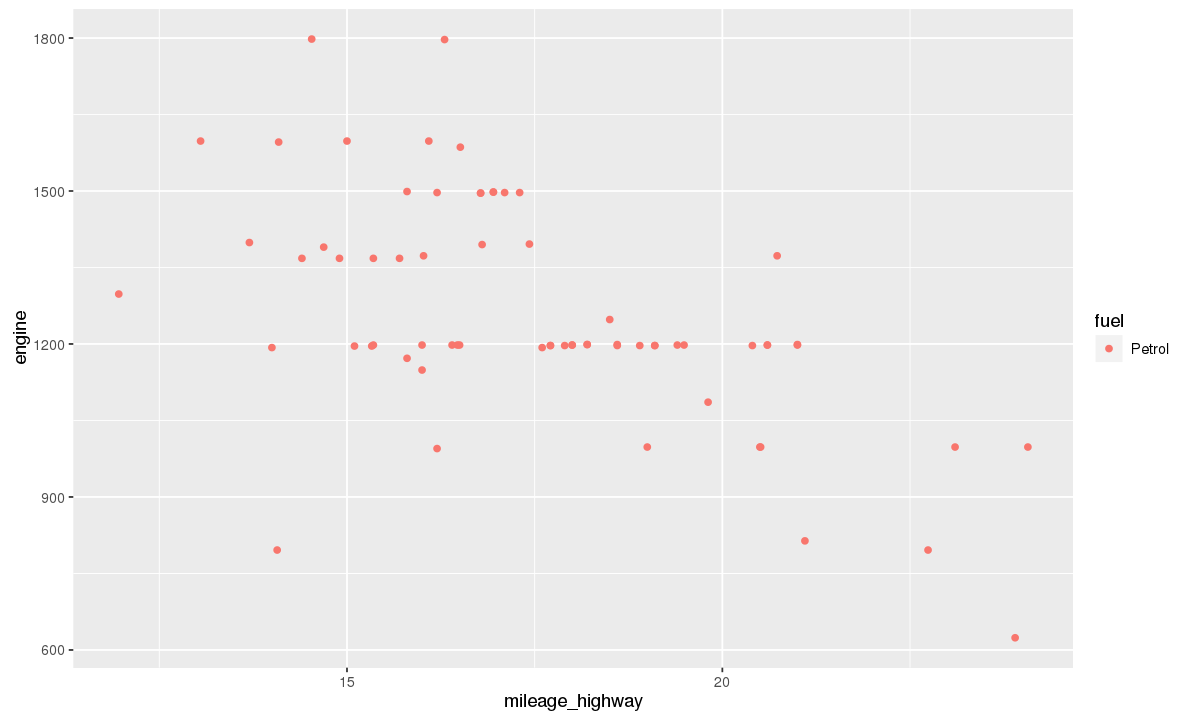

In [17]:
ggplot(filter(df, fuel == ' Petrol'),
 aes(mileage_highway, engine, color=fuel)) + geom_point()

### Mileage vs Price vs Engine capacity

Warning message:
: Removed 1 rows containing missing values (geom_point).

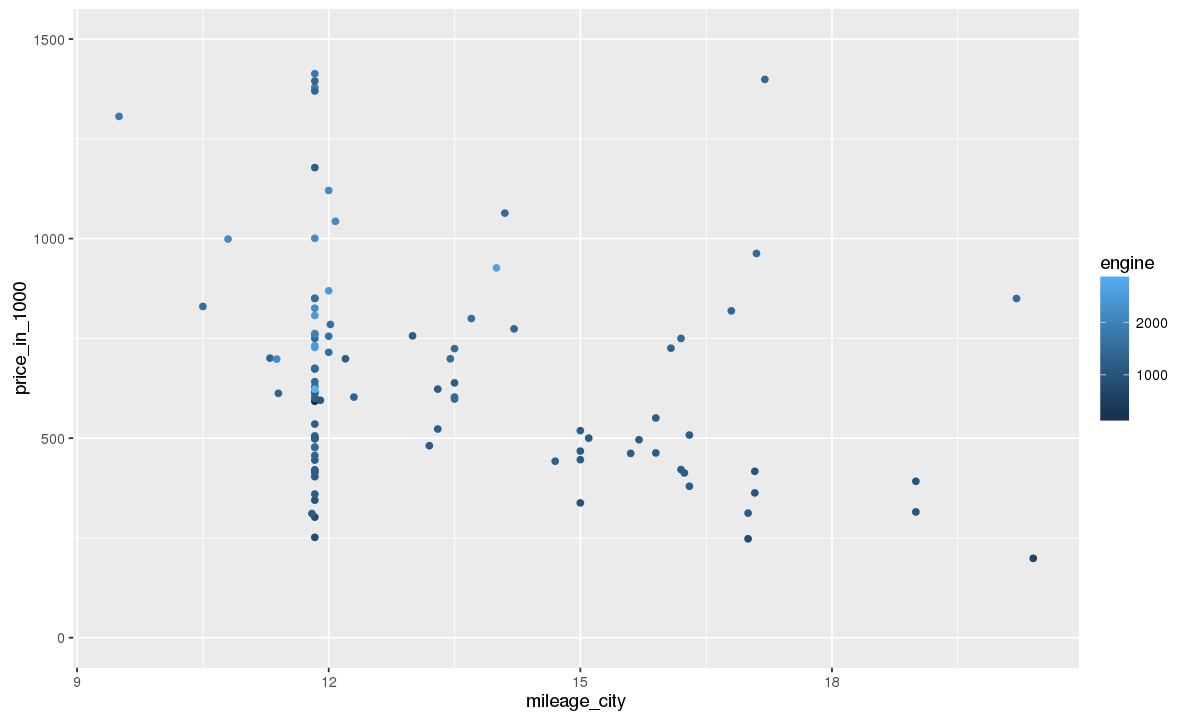

In [18]:
ggplot(df,
 aes(mileage_city, price_in_1000, color=engine)) + geom_point() + ylim(c(0,1500))

Price vs Mileage

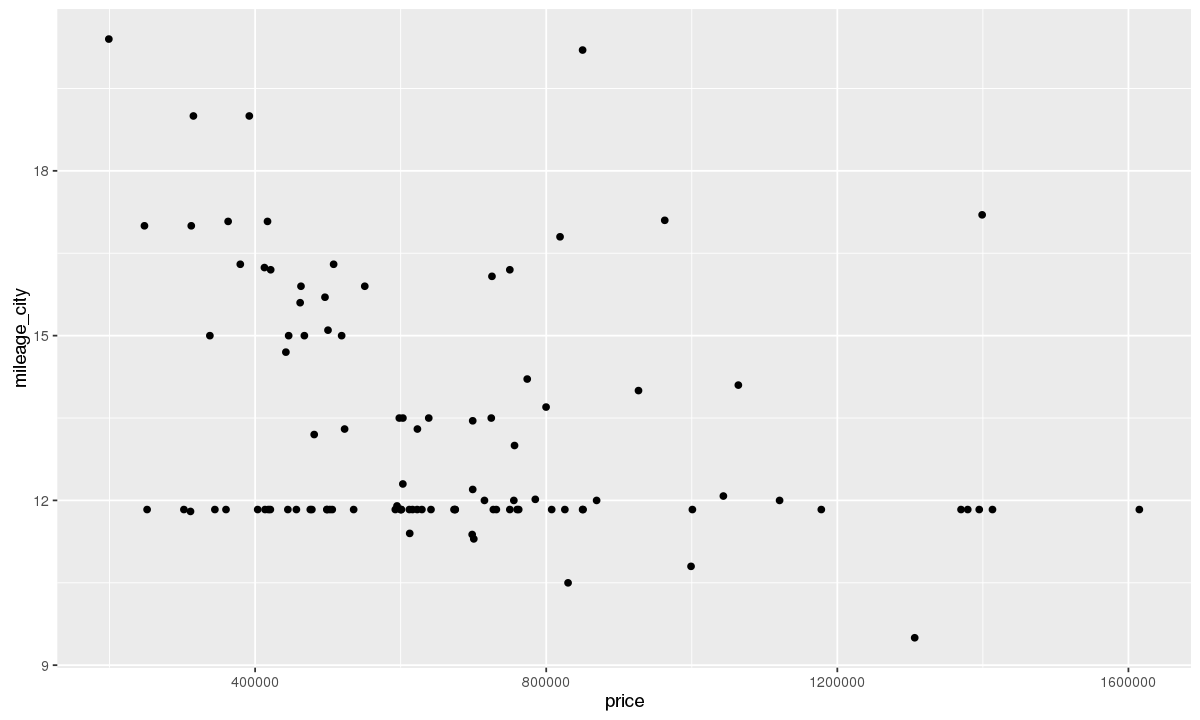

In [19]:
ggplot(df, aes(price, mileage_city)) + geom_point()